In [1]:
import numpy as np
import pygame as pg
import time
import matplotlib.pyplot as plt

pygame 2.6.1 (SDL 2.28.4, Python 3.12.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def run(screen):
    running = True
    clock = pg.time.Clock()
    pg.display.flip()
    screen.fill('black')
    for event in pg.event.get():
        if event.type == pg.quit:
            running = False
        
    keys = pg.key.get_pressed()
    if keys[pg.K_ESCAPE] or keys[pg.K_q]:
        running = False
        
    dt = clock.tick(60)

    return running

def window_init(size=(1280,720)):
    pg.init()
    screen = pg.display.set_mode(size)
    font = pg.font.SysFont('Arial', 24)
    return screen, font

def handle_mouse():
    pos = pg.mouse.get_pos()
    click = pg.mouse.get_pressed()[0]
    return pos, click



In [5]:
# math functions

def generate_imaginary_matrix(size=(10,10), x_range=(-1,1), y_range=(-1,1)):
    points = []
    for y in np.linspace(y_range[0], y_range[1], size[1]):
        for x in np.linspace(x_range[0], x_range[1], size[0]):
            points.append(complex(x, y))
    return np.array(points)

def convert_array_to_pixels(array, size, color=(255, 255, 255)):

    # get min/max to scale points
    min = np.amin(array)
    max = np.amax(array)
    array = np.multiply(array - min, 1/(max - min))
    
    # convert 1D array into 2D pixel array
    a = []
    iter = 0
    for yy in range(0, size[1]):
        a_row = []
        for xx in range(0, size[0]):
            val = array[iter]
            a_row.append((color[0]*val, color[1]*val, color[2]*val))
            iter = iter + 1
        a.append(a_row)
    return np.flipud(np.rot90(a))

# same here, seems to simplify some stuff but it goes yellow
def julia_set_points(m, func, r=1.5, c=0, max_iter=50):

    # generate initial arrays
    z = m
    i = np.array([0]*len(z))
    
    # run iteration
    for n in range(0, max_iter):
        y = abs(z) < r
        z = y * func(z, c)
        i = i + (n * ((y == False) * (i == 0)))
    return i

def screen_to_axis(screen_size, screen_point, x_range, y_range):
    x = (screen_point[0] - screen_size[0]/2) * ((x_range[1] - x_range[0])/screen_size[0])
    y = (screen_point[1] - screen_size[1]/2) * ((y_range[1] - y_range[0])/screen_size[1]) * -1
    return (round(x,2), round(y,2))

In [4]:
# previous method that I know works

def julia_set_points(m, r=1.5, c=0, max_iter=50):

    # define function
    func = lambda z, c: z**2 + c # julia set of z^2 + c
    #func = lambda z, c: z - c*((z**3 - 1)/(3 * z**2)) # newtons fractal for z^3 - 1, kind of
    #func = lambda z, c: z - c*((z**4 - z - 1)/(3*z**3 - 1)) # newtons fractal for z^3 - 1, kind of
    #func = lambda z, c: z - ((z**3 - 1)/(3*z**2)) + c # nova fractal?


    # generate initial arrays
    z = m
    i = np.array([0]*len(z))
    b = np.array([1]*len(z))
    
    # run iteration
    for n in range(0, max_iter):
        zz = func(z, c)
        y = abs(zz) < r
        b = b * y
        z = b * zz
        i = i + (n * ((y == False) * (i == 0)))
    return i

In [43]:
size = (200, 200)

x_range=(-1.5,1.5)
y_range=(-1.5,1.5)

c = 0 - 0j
max_iter = 30
r = 2.5

func = lambda z, c: z**2 + c # julia set of z^2 + c
#func = lambda z, c: z - c*((z**3 - 1)/(3 * z**2)) # newtons fractal for z^3 - 1, kind of
#func = lambda z, c: z - c*((z**4 - z - 1)/(3*z**3 - 1)) # newtons fractal for z^3 - 1, kind of
#func = lambda z, c: z - ((z**3 - 1)/(3*z**2)) + c # nova fractal?

In [44]:
screen, font = window_init(size)

BLU = (0, 0, 255)
RED = (255, 0, 0)
GRN = (0, 255, 0)
WHITE = (255, 255, 255)

color = GRN

m = generate_imaginary_matrix(size=size, x_range=x_range, y_range=y_range)
i = julia_set_points(m=m, func=func, c=c, max_iter=max_iter)
a = convert_array_to_pixels(i, size, color=color)

while run(screen):
    pos, click = handle_mouse()
    pos = screen_to_axis(pg.display.get_window_size(), pos, x_range=x_range, y_range=y_range)
    if click:
        i = julia_set_points(m=m, func=func, c=complex(pos[0], pos[1]), max_iter=max_iter, r=r)
        a = convert_array_to_pixels(i, size, color=color)
    pg.surfarray.blit_array(screen, a)
    text = font.render(str(pos), True, 'white')
    screen.blit(text, (0,0))
pg.quit()

In [20]:
pg.quit()

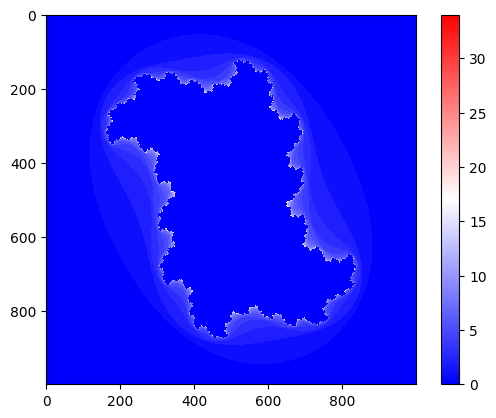

In [380]:
# try imshow

a = []
iter = 0
for yy in range(1, size[1]):
    a_row = []
    for xx in range(0, size[0]):
        a_row.append(i[iter])
        iter = iter + 1
    a.append(a_row)
a = np.array(a)

# Display the array as an image
plt.imshow(a, cmap='bwr', interpolation='nearest')
plt.colorbar()  
plt.show()